In [1]:
# Import necessary libraries.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset and display the header. It contains transactions from 01/12/2010 and 09/12/2011.
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Display the footer of the dataset.
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


**Data Cleaning**

In [4]:
# Display shape of the dataset (number of rows and columns).
df.shape

(1067371, 8)

In [5]:
df = df.rename(columns={
    "Customer ID" : "CustomerID"
})

In [6]:
# Display CustomerID distribution by country.
country_cust_data=df[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


In [7]:
# Select data from the United Kingdom.
df = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [8]:
# Check any missing values in the dataset.
df.isnull().sum(axis=0)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     240029
Country             0
dtype: int64

In [9]:
# Remove missing values from the CustomerID column. We can ignore missing values in the description column for 
# RFM/K-Means modeling.
df = df[pd.notnull(df['CustomerID'])]

# Check any negative values in the Quantity column.
df.Quantity.min()

-80995

In [17]:
# Check any negative values in the UnitPrice column
df.Price.min()

0.0

In [12]:
# Filter out records with negative values in the Quantity column.
df = df[(df['Quantity']>0)]

In [13]:
# Convert the string data type column InvoiceDate to datetime.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
# Add a new column for TotalAmount (Total Purchase Amount).
df['TotalAmount'] = df['Quantity'] * df['Price']

In [19]:
# Display shape of the dataset (number of rows and columns) after dataset is cleaned.
df.shape

(725296, 9)

In [20]:
# Display the header of the dataset.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [21]:
# Display the footer of the dataset.
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount
981325,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
981326,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
981327,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
981328,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8
981329,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.8


**RFM Modelling**

In [23]:
# Import necessary libraries.
import datetime as dt
import seaborn as sns
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [24]:
NOW = dt.date(2011,12,10) 
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [25]:
# Create Recency column.
df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,326
1,12608.0,405
2,12745.0,487
3,12746.0,541
4,12747.0,3


In [27]:
# Create Frequency and Monetary columns.
FM_Table = df.groupby('CustomerID').agg({'Invoice'   : lambda x:len(x),
                                         'TotalAmount'  : lambda x:x.sum()})
FM_Table.rename(columns = {'Invoice' :'Frequency',
                           'TotalAmount':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,34,77556.46
12608.0,16,415.79
12745.0,22,723.85
12746.0,17,254.55
12747.0,257,9276.54


In [28]:
# Create Recency, Frequency and Monetary with CustomerID.
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,34,77556.46
1,12608.0,405,16,415.79
2,12745.0,487,22,723.85
3,12746.0,541,17,254.55
4,12747.0,3,257,9276.54


In [29]:
# Descriptive Statistics (Recency).
RFM_Table.Recency.describe()

count    5353.000000
mean      203.683729
std       210.120997
min         1.000000
25%        26.000000
50%        99.000000
75%       382.000000
max       739.000000
Name: Recency, dtype: float64

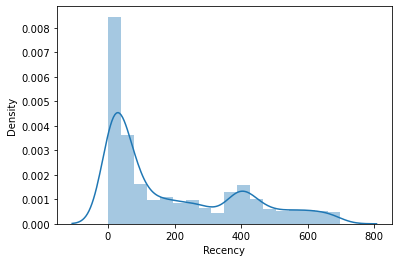

In [30]:
# Recency distribution plot, taking observations which have frequency less than 700.
x = RFM_Table.query('Recency < 700')['Recency']

ax = sns.distplot(x)

In [31]:
# Descriptive Statistics (Frequency).
RFM_Table.Frequency.describe()

count     5353.000000
mean       135.493368
std        325.997871
min          1.000000
25%         20.000000
50%         53.000000
75%        142.000000
max      12890.000000
Name: Frequency, dtype: float64

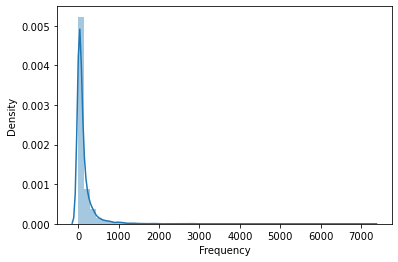

In [32]:
# Frequency distribution plot, taking observations which have frequency less than 8000.
x = RFM_Table.query('Frequency < 8000')['Frequency']

ax = sns.distplot(x)

In [33]:
# Descriptive Statistics (Monetary).
RFM_Table.Monetary.describe()

count      5353.000000
mean       2750.447883
std       12077.255964
min           0.000000
25%         335.520000
50%         848.710000
75%        2212.280000
max      608821.650000
Name: Monetary, dtype: float64

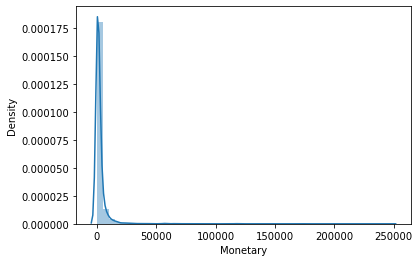

In [34]:
# Monateray distribution plot, taking observations which have monetary value less than 260000.
x = RFM_Table.query('Monetary < 260000')['Monetary']

ax = sns.distplot(x)

In [35]:
# Split into four segments using quantiles.
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [36]:
# Display the quantiles of Recency, Frequency, and Monetary.
quantiles

{'CustomerID': {0.25: 14190.0, 0.5: 15564.0, 0.75: 16922.0},
 'Recency': {0.25: 26.0, 0.5: 99.0, 0.75: 382.0},
 'Frequency': {0.25: 20.0, 0.5: 53.0, 0.75: 142.0},
 'Monetary': {0.25: 335.52, 0.5: 848.71, 0.75: 2212.2799999999997}}

In [37]:
segmented_rfm = RFM_Table.copy()

In [39]:
# Functions to create R, F and M segments.
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [40]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,326,34,77556.46,3,3,1
1,12608.0,405,16,415.79,4,4,3
2,12745.0,487,22,723.85,4,3,3
3,12746.0,541,17,254.55,4,4,4
4,12747.0,3,257,9276.54,1,1,1


In [41]:
# Calculate and add RFM_Segment value column showing combined concatenated score of RFM.
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+\
                            segmented_rfm.M_quartile.map(str)

In [42]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,326,34,77556.46,3,3,1,331
1,12608.0,405,16,415.79,4,4,3,443
2,12745.0,487,22,723.85,4,3,3,433
3,12746.0,541,17,254.55,4,4,4,444
4,12747.0,3,257,9276.54,1,1,1,111


In [43]:
# Calculate and add RFM_Score value column showing total sum of RFM_Segment values.
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [44]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,326,34,77556.46,3,3,1,331,7
1,12608.0,405,16,415.79,4,4,3,443,11
2,12745.0,487,22,723.85,4,3,3,433,10
3,12746.0,541,17,254.55,4,4,4,444,12
4,12747.0,3,257,9276.54,1,1,1,111,3


In [45]:
# Display the unique number of RFMScore.
segmented_rfm['RFM_Score'].unique()

array([ 7, 11, 10, 12,  3,  8,  5,  6,  9,  4], dtype=int64)

In [46]:
# Display the distribution of RFM_Score.
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3            10.5     562.7  13041.0   561
4            36.1     284.9   4840.8   496
5            70.8     181.7   3090.9   501
6            96.7     113.2   2366.7   511
7           155.3      76.0   1412.0   567
8           192.6      51.5   1094.8   575
9           229.7      34.1    664.7   553
10          319.8      24.7    416.2   577
11          386.7      17.5    244.6   514
12          547.3       9.3    169.9   498

In [47]:
# Validate the data for RFMGroup = 111.
segmented_rfm[segmented_rfm['RFM_Segment']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,5168,18102.0,1,1058,608821.65,1,1,1,111,3
1,4530,17450.0,9,425,246973.09,1,1,1,111,3
2,858,13694.0,4,1525,196482.81,1,1,1,111,3
3,4588,17511.0,3,1911,175603.55,1,1,1,111,3
4,3779,16684.0,5,718,147142.77,1,1,1,111,3
5,2181,15061.0,4,987,137818.52,1,1,1,111,3
6,5016,17949.0,2,157,118628.08,1,1,1,111,3
7,2430,15311.0,1,4434,116771.16,1,1,1,111,3
8,270,13089.0,3,3363,116737.86,1,1,1,111,3
9,115,12931.0,22,218,92347.34,1,1,1,111,3


In [48]:
# Validate the data for RFMGroup = 444.
segmented_rfm[segmented_rfm['RFM_Segment']=='444'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,4892,17821.0,407,6,334.62,4,4,4,444,12
1,3336,16234.0,477,15,333.18,4,4,4,444,12
2,1286,14137.0,696,11,332.70,4,4,4,444,12
3,3551,16452.0,631,18,332.17,4,4,4,444,12
4,4518,17435.0,412,15,331.35,4,4,4,444,12
5,39,12850.0,446,2,330.00,4,4,4,444,12
6,5251,18186.0,723,11,329.58,4,4,4,444,12
7,3388,16286.0,478,17,328.95,4,4,4,444,12
8,2846,15735.0,422,19,327.68,4,4,4,444,12
9,668,13498.0,731,17,327.38,4,4,4,444,12


In [49]:
# Show different types of customer segments based on RFM score.
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  561
Loyal Customers:  1336
Big Spenders:  1338
Almost Lost:  25
Lost Customers:  256
Lost Cheap Customers:  498


In [51]:
# Import necessary libraries.
from scipy import stats
from feature_engine.outliers import Winsorizer
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [52]:
# Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 0.871315749881504, : SkewtestResult(statistic=22.675365725130845, pvalue=7.842747604682933e-114)
Frequency's: Skew: 17.329795862613057, : SkewtestResult(statistic=91.69617764462113, pvalue=0.0)
Monetary's: Skew: 28.97046030564041, : SkewtestResult(statistic=104.2630824842121, pvalue=0.0)


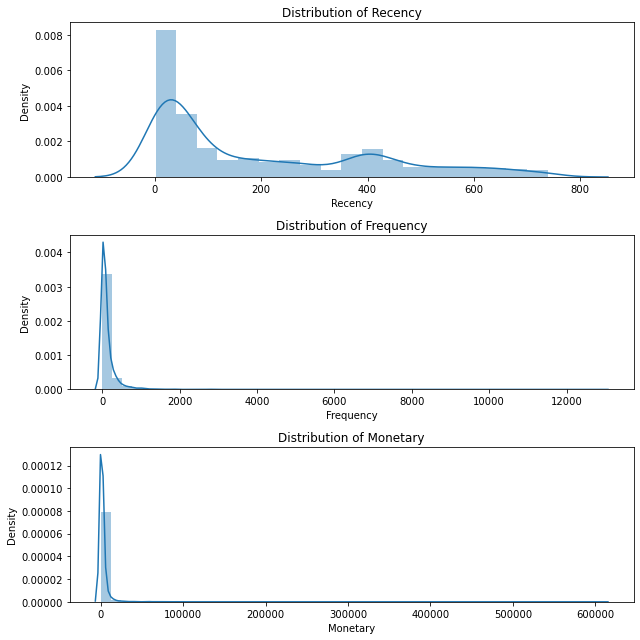

In [53]:
# Plot all 3 graphs together for summary findings.
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(RFM_Table,'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_Table,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_Table,'Monetary')

plt.tight_layout()

In [54]:
df_rfm_log = RFM_Table.copy()

In [55]:
df_rfm_log.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,34,77556.46
1,12608.0,405,16,415.79
2,12745.0,487,22,723.85
3,12746.0,541,17,254.55
4,12747.0,3,257,9276.54


Recency's: Skew: -0.45652405490404224, : SkewtestResult(statistic=-13.030572223540211, pvalue=8.199044307398519e-39)
Frequency's: Skew: -0.031144687481604587, : SkewtestResult(statistic=-0.931339824232497, pvalue=0.35167780785204517)
Monetary's: Skew: 0.18276114218141187, : SkewtestResult(statistic=5.422078946586307, pvalue=5.8909852704032605e-08)


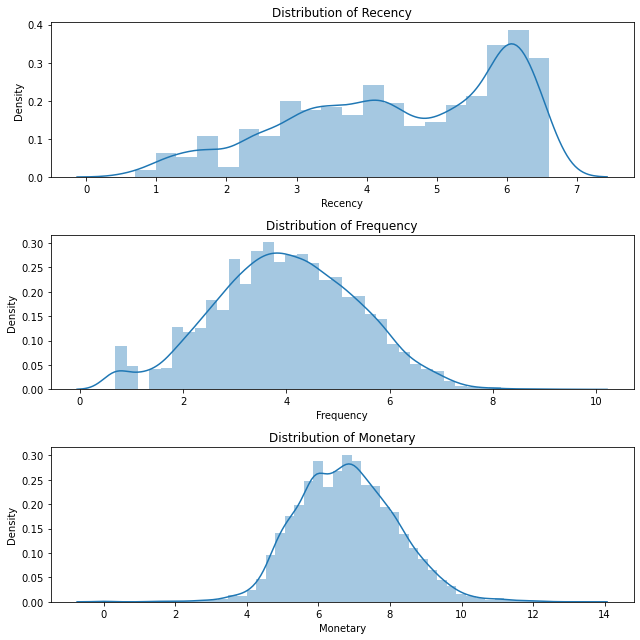

In [56]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [57]:
RFM_Table.describe()

,CustomerID,Recency,Frequency,Monetary
count,5353.000000,5353.000000,5353.000000,5353.000000
mean,15556.524566,203.683729,135.493368,2750.447883
std,1581.187812,210.120997,325.997871,12077.255964
min,12346.000000,1.000000,1.000000,0.000000
25%,14190.000000,26.000000,20.000000,335.520000
50%,15564.000000,99.000000,53.000000,848.710000
75%,16922.000000,382.000000,142.000000,2212.280000
max,18287.000000,739.000000,12890.000000,608821.650000


In [58]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [59]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [60]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

In [61]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled.head()

,CustomerID,Recency,Frequency,Monetary
0,-2.205943,0.857714,-0.329412,2.126592
1,-2.000912,1.001009,-0.871922,-0.575622
2,-1.895391,1.122829,-0.644831,-0.152186
3,-1.894625,1.192328,-0.828981,-0.949919
4,-1.893859,-2.036218,1.171309,1.798548


In [62]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

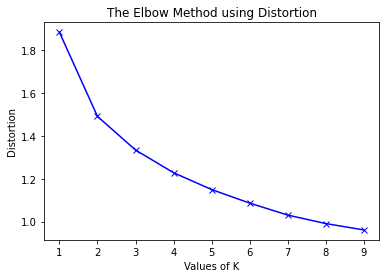

In [63]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

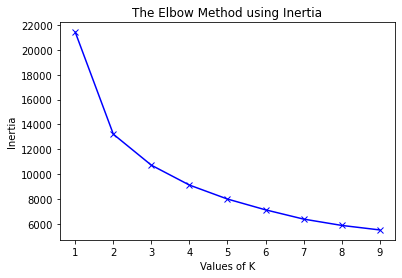

In [64]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [65]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

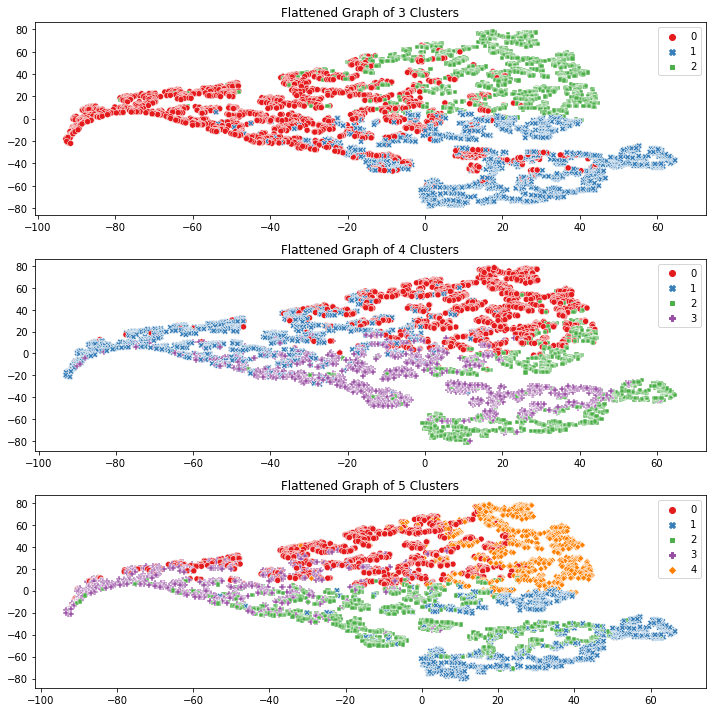

In [66]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, RFM_Table)

plt.tight_layout()

In [67]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format.
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

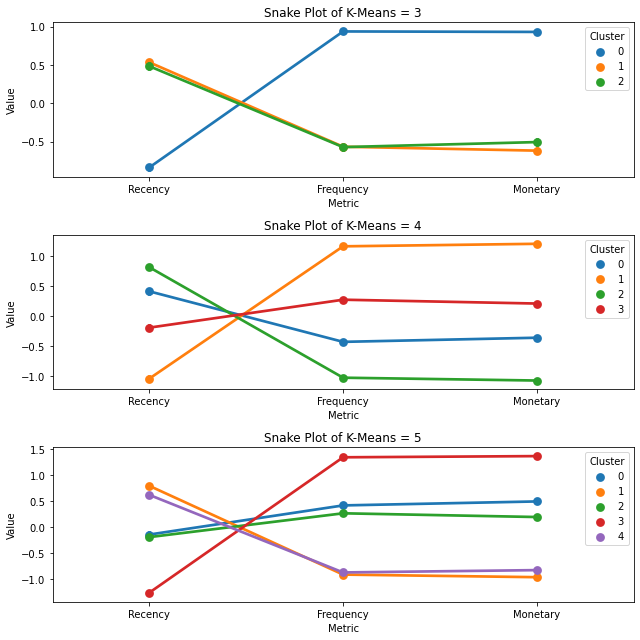

In [68]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

In [69]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [70]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         266.0      43.0    891.0  1418
1          35.0     392.0   8414.0  1259
2         391.0      18.0    280.0  1226
3         130.0     103.0   1740.0  1450

**Observation from Clusters**
* Cluster 1 refers to the Best Loyal Customers. They spend a lot of money, revisit frequently, and make purchases recently.
* Cluster 2 refers to the Cheapest Customers. They spend less money, revisit seldomly, and long time haven't purchased.
* Cluster 3 refers to the Potential Growth Customer (to Best Loyal Customer). They tend to spend a lot of money, revisit frequently, and make purchases recently. Can do additional promotion (products/discounts with the volume of purchase) to attract them and make them become best loyal customers (expand the customer base of Best Loyal Customers).
* Cluster 0 refers to the Potential Lost Customer. They tend to spend less money, revisit seldomly, and long time haven't purchased. Can do additional promotions (coupons/discounts) to attract them to return.